In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from collections import Counter

In [2]:
data = pd.read_csv("C:/Users/Danie/OneDrive/Desktop/Columbia_Bootcamp/Modules/Module_20_2/class/Covid_Comorbidities/Database/Resources/Covid-19/Cleaned_Data/MACHINE_LEARNING_FINAL_STRIPPED.csv")

In [3]:
data.head()


,Unnamed: 0,County_name,State,age_group,sex,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,0,Wayne,OH,65+ years,Male,Symptomatic,Yes,No,No,Yes
1,1,Wayne,OH,65+ years,Male,Symptomatic,Yes,No,No,Yes
2,2,Wayne,OH,65+ years,Male,Symptomatic,No,No,Yes,Yes
3,3,Wayne,OH,65+ years,Male,Symptomatic,No,No,No,Yes
4,4,Wayne,OH,65+ years,Male,Symptomatic,No,No,No,Yes


In [4]:
data.tail()

,Unnamed: 0,County_name,State,age_group,sex,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
446683,446683,Orleans,NY,50 to 64 years,Female,Symptomatic,Yes,No,No,Yes
446684,446684,Orleans,NY,18 to 49 years,Female,Symptomatic,Yes,No,No,Yes
446685,446685,Orleans,NY,18 to 49 years,Female,Symptomatic,No,No,No,Yes
446686,446686,Orleans,NY,18 to 49 years,Female,Symptomatic,No,No,No,Yes
446687,446687,DeKalb,AL,18 to 49 years,Female,Symptomatic,No,No,No,Yes


In [5]:
data.describe()

,Unnamed: 0
count,446688.000000
mean,223343.500000
std,128947.862859
min,0.000000
25%,111671.750000
50%,223343.500000
75%,335015.250000
max,446687.000000


In [6]:
data.nunique()

Unnamed: 0                  446688
County_name                    481
State                           27
age_group                        5
sex                              2
symptom_status                   2
hosp_yn                          2
icu_yn                           2
death_yn                         2
underlying_conditions_yn         2
dtype: int64

In [7]:
data.isnull().sum()

Unnamed: 0                  0
County_name                 0
State                       0
age_group                   0
sex                         0
symptom_status              0
hosp_yn                     0
icu_yn                      0
death_yn                    0
underlying_conditions_yn    0
dtype: int64

In [8]:
data['age_group'].unique()

array(['65+ years', '18 to 49 years', '50 to 64 years', '0 - 17 years',
       'Missing'], dtype=object)

In [9]:
data.groupby('age_group').count()

,Unnamed: 0,County_name,State,sex,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
age_group,,,,,,,,,
0 - 17 years,23783,23783,23783,23783,23783,23783,23783,23783,23783
18 to 49 years,193648,193648,193648,193648,193648,193648,193648,193648,193648
50 to 64 years,109544,109544,109544,109544,109544,109544,109544,109544,109544
65+ years,119712,119712,119712,119712,119712,119712,119712,119712,119712
Missing,1,1,1,1,1,1,1,1,1


In [10]:
#sns.distplot(data['sex'])

In [11]:
data.groupby('sex').count()

,Unnamed: 0,County_name,State,age_group,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
sex,,,,,,,,,
Female,245308,245308,245308,245308,245308,245308,245308,245308,245308
Male,201380,201380,201380,201380,201380,201380,201380,201380,201380


In [12]:
data.groupby('sex')['death_yn'].count()

sex
Female    245308
Male      201380
Name: death_yn, dtype: int64

In [13]:
data.shape

(446688, 10)

In [14]:
data.groupby(['symptom_status', 'death_yn'])['Unnamed: 0'].count()

symptom_status  death_yn
Asymptomatic    No           15219
                Yes            524
Symptomatic     No          410779
                Yes          20166
Name: Unnamed: 0, dtype: int64

In [15]:
data.head()

,Unnamed: 0,County_name,State,age_group,sex,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,0,Wayne,OH,65+ years,Male,Symptomatic,Yes,No,No,Yes
1,1,Wayne,OH,65+ years,Male,Symptomatic,Yes,No,No,Yes
2,2,Wayne,OH,65+ years,Male,Symptomatic,No,No,Yes,Yes
3,3,Wayne,OH,65+ years,Male,Symptomatic,No,No,No,Yes
4,4,Wayne,OH,65+ years,Male,Symptomatic,No,No,No,Yes


In [16]:
data = pd.get_dummies(data, drop_first = True)
data.columns

Index(['Unnamed: 0', 'County_name_Adams', 'County_name_Addison',
       'County_name_Alamance', 'County_name_Albany', 'County_name_Alexander',
       'County_name_Allegheny', 'County_name_Allen', 'County_name_Anderson',
       'County_name_Anne Arundel',
       ...
       'age_group_18 to 49 years', 'age_group_50 to 64 years',
       'age_group_65+ years', 'age_group_Missing', 'sex_Male',
       'symptom_status_Symptomatic', 'hosp_yn_Yes', 'icu_yn_Yes',
       'death_yn_Yes', 'underlying_conditions_yn_Yes'],
      dtype='object', length=517)

In [17]:
data = data[['age_group_18 to 49 years',
       'age_group_50 to 64 years', 'age_group_65+ years', 'sex_Male', 
       'symptom_status_Symptomatic',  'hosp_yn_Yes', 
       'icu_yn_Yes', 'death_yn_Yes',
      'underlying_conditions_yn_Yes']]

In [18]:
correlation = data.corr()

In [19]:
correlation

,age_group_18 to 49 years,age_group_50 to 64 years,age_group_65+ years,sex_Male,symptom_status_Symptomatic,hosp_yn_Yes,icu_yn_Yes,death_yn_Yes,underlying_conditions_yn_Yes
age_group_18 to 49 years,1.000000,-0.498653,-0.529326,-0.052905,0.034321,-0.248927,-0.137434,-0.182195,-0.075385
age_group_50 to 64 years,-0.498653,1.000000,-0.344903,0.020857,0.017404,0.015728,0.013689,-0.064642,0.069250
age_group_65+ years,-0.529326,-0.344903,1.000000,0.024220,-0.050186,0.311755,0.163857,0.293133,0.126899
sex_Male,-0.052905,0.020857,0.024220,1.000000,-0.004211,0.054584,0.067293,0.056586,0.014530
symptom_status_Symptomatic,0.034321,0.017404,-0.050186,-0.004211,1.000000,0.014882,0.024232,0.011853,-0.006263
hosp_yn_Yes,-0.248927,0.015728,0.311755,0.054584,0.014882,1.000000,0.458075,0.353466,0.114015
icu_yn_Yes,-0.137434,0.013689,0.163857,0.067293,0.024232,0.458075,1.000000,0.422779,0.058347
death_yn_Yes,-0.182195,-0.064642,0.293133,0.056586,0.011853,0.353466,0.422779,1.000000,0.054450
underlying_conditions_yn_Yes,-0.075385,0.069250,0.126899,0.014530,-0.006263,0.114015,0.058347,0.054450,1.000000


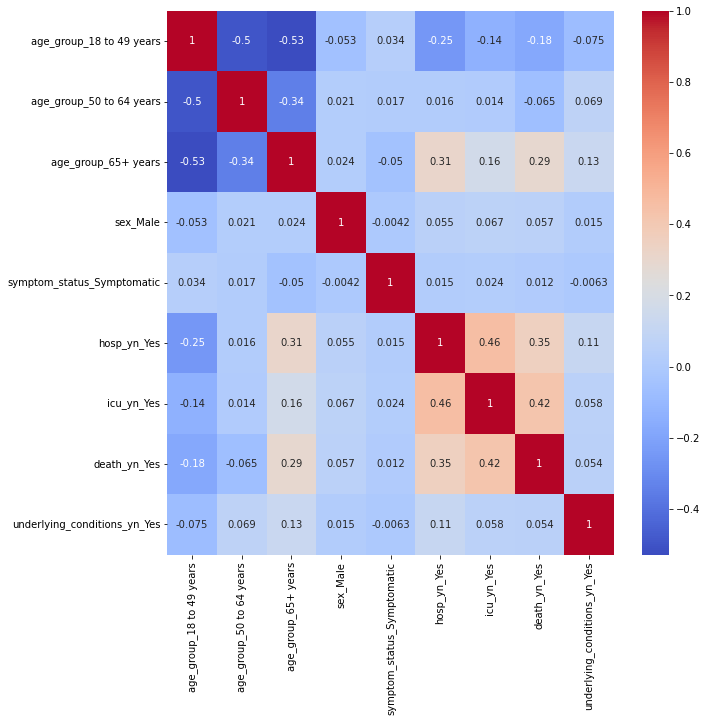

In [29]:
plt.figure(figsize= (10,10)) 
sns.heatmap(correlation, xticklabels = correlation.columns, yticklabels=  correlation.columns, annot = True	, cmap= "coolwarm"); 


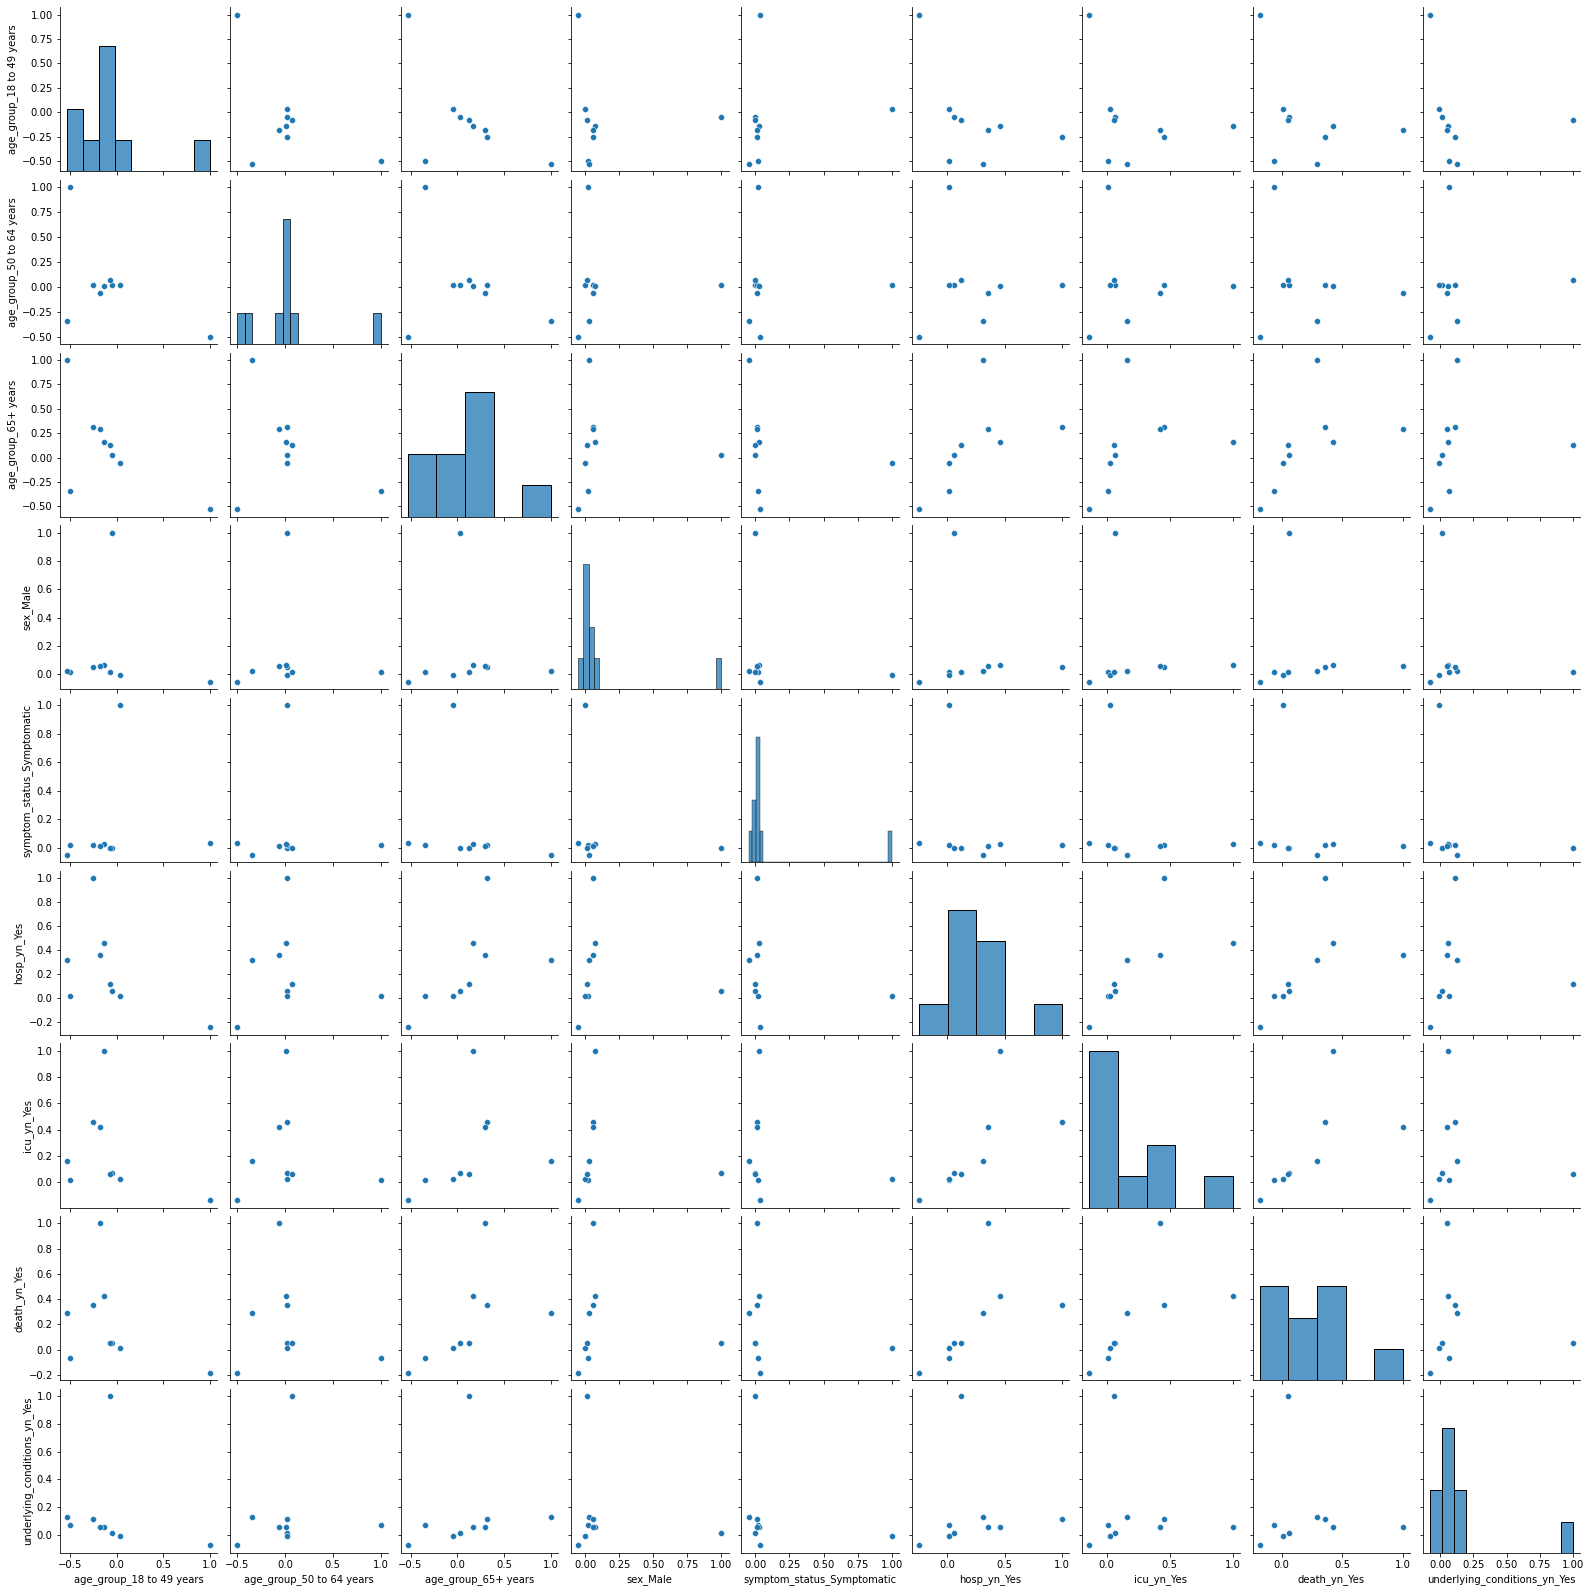

In [30]:
sns.pairplot(correlation)

In [ ]:
#sns.relplot(x= 'symptom_status_Symptomatic', y= 'icu_yn_Yes', hue= 'sex', data= data)

In [ ]:
#sns.catplot(x= 'underlying_conditions_yn_Yes', kind= 'box', data= data)

## For Visualization 

In [ ]:
#data = pd.read_csv("C:/Users/Danie/OneDrive/Desktop/Columbia_Bootcamp/Modules/Module_20/class/Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age__Provisional_2020-2022.csv")

In [ ]:
#data.head()

In [ ]:
#data.tail()

In [ ]:
#data.describe()

In [ ]:
#data.nunique()

In [ ]:
#data.isnull().sum()

In [ ]:
#data['Condition Group'].unique()